In [119]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

In [121]:
df = pd.read_csv(r"D:\DATA ANALYST\Co Supply Chain Analysis\DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [122]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Cleaning Data


In [125]:
np.sum(df.isna())

C:\Users\PC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [126]:
# Replace missing values in 'Customer Zipcode' and 'Order Zipcode' with 0
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0)

# Replace missing values in 'Customer Fname' with "NotDetermined"
df['Customer Fname'] = df['Customer Fname'].fillna("NotDetermined")

# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [128]:
# Các trường liên quan đến COD Risk, Payment Fraud, Location Cheating, và Sharing Account
fields = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Late_delivery_risk',
    'Order Status',
    'Delivery Status',
    'order date (DateOrders)',
    'shipping date (DateOrders)',
    'Order Item Quantity',
    'Order Item Product Price',
    'Customer Segment',
    'Sales per customer',
    'Order Profit Per Order',
    'Customer Id',
    'Customer Full Name',
    'Order Id',
    'Order Customer Id',
    'Order Item Discount',
    'Order Item Discount Rate',
    'Sales',
    'Order Item Total',
    'Customer City',
    'Customer Country',
    'Customer State',
    'Customer Zipcode',
    'Latitude',
    'Longitude',
    'Order City',
    'Order Country',
    'Order State',
    'Order Zipcode',
    'Shipping Mode'
]

# Lọc bộ dữ liệu chỉ lấy các trường liên quan
filtered_df = df[fields]
filtered_df.head()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Order Status,Delivery Status,order date (DateOrders),shipping date (DateOrders),Order Item Quantity,Order Item Product Price,Customer Segment,...,Customer Country,Customer State,Customer Zipcode,Latitude,Longitude,Order City,Order Country,Order State,Order Zipcode,Shipping Mode
0,3,4,0,COMPLETE,Advance shipping,1/31/2018 22:56,2/3/2018 22:56,1,327.75,Consumer,...,Puerto Rico,PR,725.0,18.251453,-66.037056,Bekasi,Indonesia,Java Occidental,0.0,Standard Class
1,5,4,1,PENDING,Late delivery,1/13/2018 12:27,1/18/2018 12:27,1,327.75,Consumer,...,Puerto Rico,PR,725.0,18.279451,-66.037064,Bikaner,India,Rajastán,0.0,Standard Class
2,4,4,0,CLOSED,Shipping on time,1/13/2018 12:06,1/17/2018 12:06,1,327.75,Consumer,...,EE. UU.,CA,95125.0,37.292233,-121.881279,Bikaner,India,Rajastán,0.0,Standard Class
3,3,4,0,COMPLETE,Advance shipping,1/13/2018 11:45,1/16/2018 11:45,1,327.75,Home Office,...,EE. UU.,CA,90027.0,34.125946,-118.291016,Townsville,Australia,Queensland,0.0,Standard Class
4,2,4,0,PENDING_PAYMENT,Advance shipping,1/13/2018 11:24,1/15/2018 11:24,1,327.75,Corporate,...,Puerto Rico,PR,725.0,18.253769,-66.037048,Townsville,Australia,Queensland,0.0,Standard Class


In [129]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Late_delivery_risk             180519 non-null  int64  
 3   Order Status                   180519 non-null  object 
 4   Delivery Status                180519 non-null  object 
 5   order date (DateOrders)        180519 non-null  object 
 6   shipping date (DateOrders)     180519 non-null  object 
 7   Order Item Quantity            180519 non-null  int64  
 8   Order Item Product Price       180519 non-null  float64
 9   Customer Segment               180519 non-null  object 
 10  Sales per customer             180519 non-null  float64
 11  Order Profit Per Order         180519 non-null  float64
 12  Customer Id                   

# Phân tích COD Risk


In [131]:
filtered_df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [132]:
# Lọc các đơn hàng có trạng thái nghi ngờ liên quan đến COD
cod_risk_df = filtered_df[filtered_df['Order Status'].isin(['PENDING_PAYMENT', 'CANCELED', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'])]

# Xem qua các đơn hàng có rủi ro COD
print(f'Tổng các đơn hàng có rủi ro COD: {cod_risk_df.shape[0]}')
cod_risk_df.to_excel(r"D:\DATA ANALYST\Co Supply Chain Analysis\Data.xlsx", index=False)


Tổng các đơn hàng có rủi ro COD: 59283


In [133]:
# Tạo bảng tổng hợp theo trạng thái đơn hàng và giá trị tổng, giá trị trung bình và lợi nhuận trung bình từng order
pivot_table = cod_risk_df.groupby('Order Status').agg(
    Số_lượng_đơn_hàng=('Order Item Total', 'count'),
    Tổng_giá_trị=('Order Item Total', 'sum'),
    Giá_trị_trung_bình=('Order Item Total', 'mean'),
    Lợi_nhuận_trung_bình=('Order Profit Per Order', 'mean')
).reset_index()

from tabulate import tabulate

# Hiển thị bảng tổng hợp
print("Bảng tổng hợp các đơn hàng có rủi ro COD theo trạng thái:")
print(tabulate(pivot_table, headers='keys', tablefmt='pretty'))

Bảng tổng hợp các đơn hàng có rủi ro COD theo trạng thái:
+---+-----------------+-------------------+-------------------+--------------------+----------------------+
|   |  Order Status   | Số_lượng_đơn_hàng |   Tổng_giá_trị    | Giá_trị_trung_bình | Lợi_nhuận_trung_bình |
+---+-----------------+-------------------+-------------------+--------------------+----------------------+
| 0 |    CANCELED     |       3692        | 668244.986689259  | 180.9981004033746  |  20.407808814967495  |
| 1 |     ON_HOLD     |       9804        | 1780237.698776325 | 181.58279261284426 |  21.30895962902652   |
| 2 | PAYMENT_REVIEW  |       1893        | 345576.163399914  | 182.55476143682725 |  22.941780286384045  |
| 3 | PENDING_PAYMENT |       39832       | 7286275.63639433  | 182.9251766517958  |  21.184229788487198  |
| 4 | SUSPECTED_FRAUD |       4062        | 741492.317583312  | 182.54365277777254 |   20.9593082315032   |
+---+-----------------+-------------------+-------------------+---------------

Giả thuyết (1): Các đơn hàng có lợi nhuận âm hoặc quá cao có thể là dấu hiệu của hành vi gian lận liên quan đến COD

In [135]:
# Tìm những đơn hàng có lợi nhuận bất thường (dưới 0 hoặc trên mức trung bình cao)
abnormal_profit_orders = cod_risk_df[(cod_risk_df['Order Profit Per Order'] < 0) | 
                                     (cod_risk_df['Order Profit Per Order'] > cod_risk_df['Order Profit Per Order'].quantile(0.95))]

# Xem các đơn hàng có lợi nhuận bất thường
print(f"Số lượng đơn hàng có lợi nhuận bất thường: {abnormal_profit_orders.shape[0]}")
print("Ví dụ các đơn hàng có lợi nhuận bất thường:")
print(tabulate(abnormal_profit_orders[['Customer Id', 'Order Id','Order Status', 'Order Item Total', 'Order Profit Per Order']].head(), headers='keys', tablefmt='pretty'))


Số lượng đơn hàng có lợi nhuận bất thường: 14232
Ví dụ các đơn hàng có lợi nhuận bất thường:
+----+-------------+----------+-----------------+------------------+------------------------+
|    | Customer Id | Order Id |  Order Status   | Order Item Total | Order Profit Per Order |
+----+-------------+----------+-----------------+------------------+------------------------+
| 4  |    19489    |  75936   | PENDING_PAYMENT |      298.25      |      134.2100067       |
| 16 |    19477    |  75924   | PENDING_PAYMENT |   321.2000122    |      -246.3600006      |
| 34 |    19459    |  75906   | PENDING_PAYMENT |   321.2000122    |      -425.5799866      |
| 35 |    19458    |  75905   | PENDING_PAYMENT |   317.9200134    |      152.6000061       |
| 40 |    19453    |  75900   | PENDING_PAYMENT |      298.25      |      143.1600037       |
+----+-------------+----------+-----------------+------------------+------------------------+


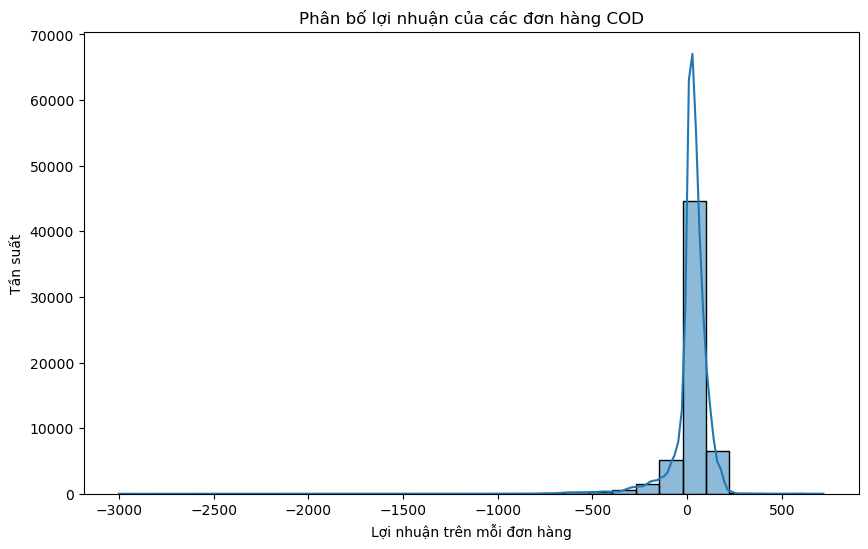

C:\Users\PC\AppData\Local\Temp\ipykernel_38752\425667919.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abnormal_profit_orders, x='Order Status', palette='viridis')


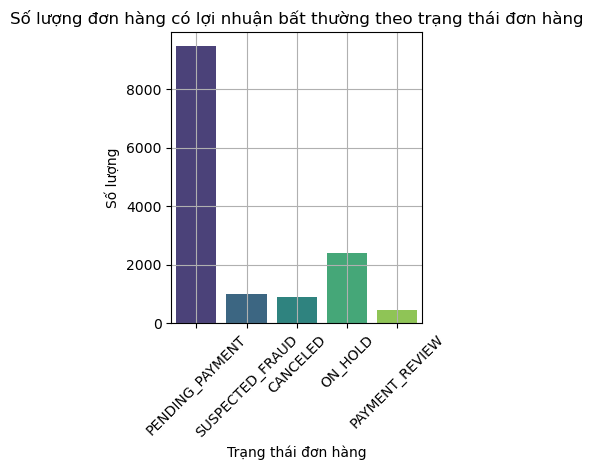

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Biểu đồ phân bố lợi nhuận
plt.figure(figsize=(10, 6))
sns.histplot(cod_risk_df['Order Profit Per Order'], bins=30, kde=True)
plt.title('Phân bố lợi nhuận của các đơn hàng COD')
plt.xlabel('Lợi nhuận trên mỗi đơn hàng')
plt.ylabel('Tần suất')
plt.show()

# Tạo biểu đồ thể hiện số lượng từng loại Order Status
plt.subplot(1, 2, 2)
sns.countplot(data=abnormal_profit_orders, x='Order Status', palette='viridis')
plt.title('Số lượng đơn hàng có lợi nhuận bất thường theo trạng thái đơn hàng')
plt.xlabel('Trạng thái đơn hàng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()



KẾT LUẬN GIẢ THUYẾT(1): 

Sau khi phân tích giả thuyết trên, các đơn hàng có lợi nhuận âm và quá lớn có 14,232 trên tổng 59,283 đơn hàng nghi ngờ rủi ro COD. Trong đó đơn hàng có số lượng lợi nhuận bất thường tập chung nhiều nhất ở "PENDING_PAYMENT" với sấp xỉ 10,000 đơn hàng chiếm gần 1/4 tổng số đơn hàng ở loại hình này, sau đó là "ON_HOLD" với hơn 2000 đơn hàng có giấu hiệu lợi nhuận bất thường, chiếm hơn 1/5 trên tổng số đơn hàng loại hình này.

Từ những gì phân tích ở giả thuyết trên, tôi tiếp tục thực hiện phân tích các giải thuyết tiếp theo để có thể đưa ra được kết luận chính xác về các đối tượng gian lận COD.

In [138]:
print(tabulate(pivot_table, headers='keys', tablefmt='pretty'))

+---+-----------------+-------------------+-------------------+--------------------+----------------------+
|   |  Order Status   | Số_lượng_đơn_hàng |   Tổng_giá_trị    | Giá_trị_trung_bình | Lợi_nhuận_trung_bình |
+---+-----------------+-------------------+-------------------+--------------------+----------------------+
| 0 |    CANCELED     |       3692        | 668244.986689259  | 180.9981004033746  |  20.407808814967495  |
| 1 |     ON_HOLD     |       9804        | 1780237.698776325 | 181.58279261284426 |  21.30895962902652   |
| 2 | PAYMENT_REVIEW  |       1893        | 345576.163399914  | 182.55476143682725 |  22.941780286384045  |
| 3 | PENDING_PAYMENT |       39832       | 7286275.63639433  | 182.9251766517958  |  21.184229788487198  |
| 4 | SUSPECTED_FRAUD |       4062        | 741492.317583312  | 182.54365277777254 |   20.9593082315032   |
+---+-----------------+-------------------+-------------------+--------------------+----------------------+


Giả thuyết (2): Các đơn hàng có thời gian giao hàng thực tế quá trễ, so với thời gian giao hàng dự kiến là dấu hiệu hành vi gian lận COD của tài xế.

In [140]:

# Lọc chỉ những đơn hàng không có nguy cơ giao hàng trễ (Late_delivery_risk = 0)
no_delayed_risk_df = cod_risk_df[cod_risk_df['Late_delivery_risk'] == 0]

# Tính toán ngưỡng chênh lệch thời gian giao hàng dựa trên thời gian giao hàng dự kiến (trường 'Days for shipment (scheduled)')
threshold_shipping_days = no_delayed_risk_df['Days for shipment (scheduled)'].mean() + 2 * no_delayed_risk_df['Days for shipment (scheduled)'].std()

# Lọc các đơn hàng có thời gian giao hàng thực tế vượt quá ngưỡng tính toán
abnormal_shipping_time = no_delayed_risk_df[no_delayed_risk_df['Days for shipping (real)'] > threshold_shipping_days]

# In ra số lượng và thông tin các đơn hàng có sự chênh lệch thời gian giao hàng bất thường
print(f"Số lượng đơn hàng có sự chênh lệch thời gian giao hàng bất thường: {len(abnormal_shipping_time)}")
print(tabulate(abnormal_shipping_time[['Order Id', 'Order Status', 'Days for shipment (scheduled)', 'Days for shipping (real)']].head(), headers='keys', tablefmt='pretty'))


Số lượng đơn hàng có sự chênh lệch thời gian giao hàng bất thường: 1234
+-----+----------+-----------------+-------------------------------+--------------------------+
|     | Order Id |  Order Status   | Days for shipment (scheduled) | Days for shipping (real) |
+-----+----------+-----------------+-------------------------------+--------------------------+
|  5  |  75935   |    CANCELED     |               4               |            6             |
| 10  |  75930   | SUSPECTED_FRAUD |               2               |            6             |
| 185 |  40495   | SUSPECTED_FRAUD |               4               |            6             |
| 192 |  49075   | SUSPECTED_FRAUD |               4               |            6             |
| 194 |  49075   | SUSPECTED_FRAUD |               4               |            6             |
+-----+----------+-----------------+-------------------------------+--------------------------+


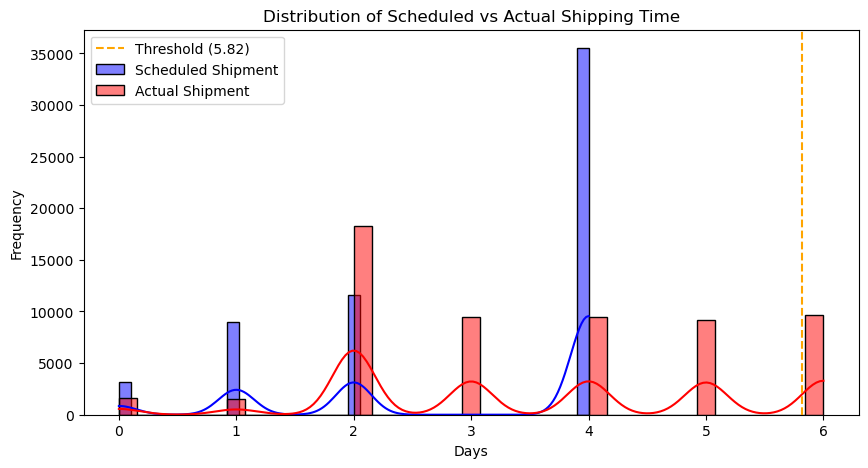

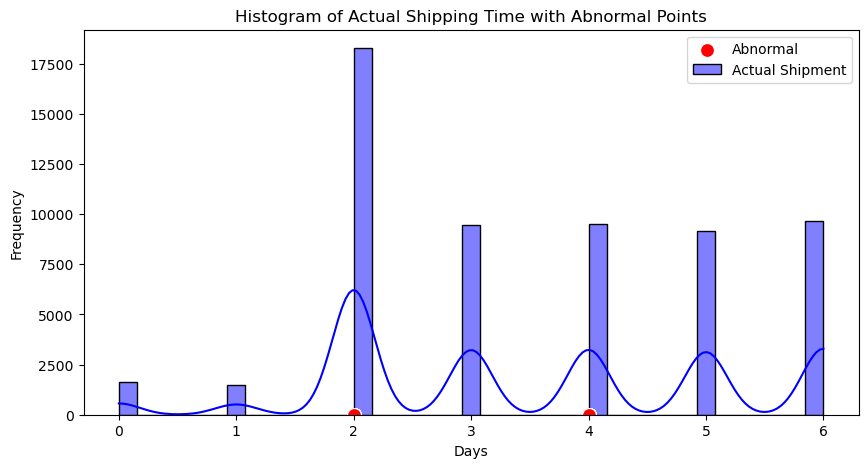

In [141]:
# Vẽ biểu đồ phân phối cho 'Days for shipment (scheduled)' và 'Days for shipping (real)'
plt.figure(figsize=(10, 5))

# Biểu đồ phân phối cho thời gian giao hàng dự kiến và thực tế
sns.histplot(cod_risk_df['Days for shipment (scheduled)'], kde=True, color='blue', label='Scheduled Shipment', alpha=0.5)
sns.histplot(cod_risk_df['Days for shipping (real)'], kde=True, color='red', label='Actual Shipment', alpha=0.5)

plt.axvline(threshold_shipping_days, color='orange', linestyle='dashed', label=f'Threshold ({threshold_shipping_days:.2f})')

# Thêm tiêu đề và nhãn
plt.title('Distribution of Scheduled vs Actual Shipping Time')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Vẽ biểu đồ histogram cho thời gian giao hàng thực tế và đánh dấu các đơn hàng bất thường
plt.figure(figsize=(10, 5))

# Vẽ histogram cho 'Days for shipping (real)'
sns.histplot(cod_risk_df['Days for shipping (real)'], kde=True, color='blue', label='Actual Shipment')

# Đánh dấu các đơn hàng bất thường
sns.scatterplot(data=abnormal_shipping_time, x='Days for shipment (scheduled)', y='Days for shipping (real)', color='red', label='Abnormal', s=100)

# Thêm tiêu đề và nhãn
plt.title('Histogram of Actual Shipping Time with Abnormal Points')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()


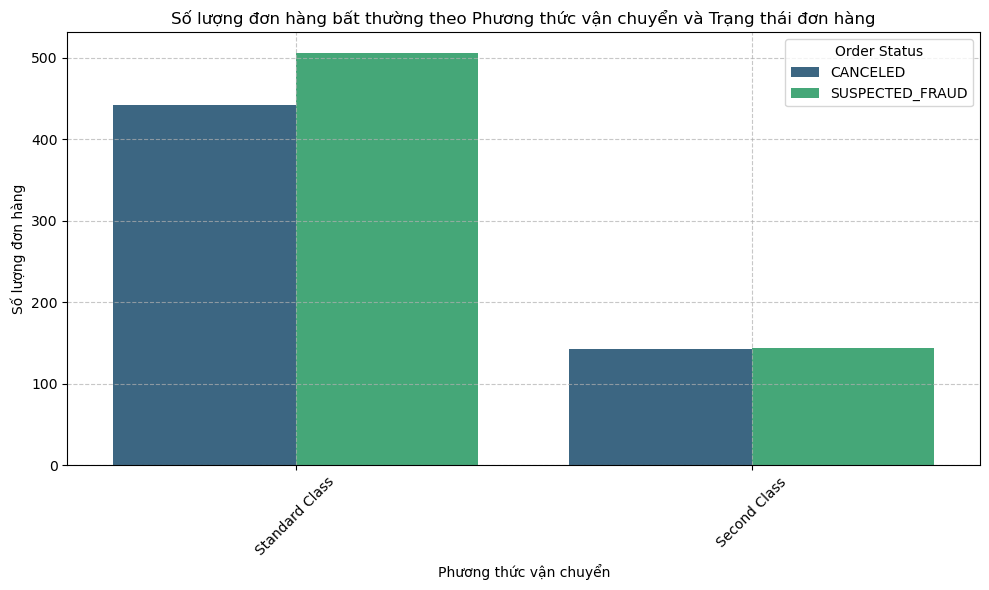

In [142]:
# Tạo biểu đồ thể hiện số lượng đơn hàng bất thường theo Shipping mode và Order Status
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ countplot cho 'Shipping mode' theo từng 'Order Status'
sns.countplot(data=abnormal_shipping_time, x='Shipping Mode', hue='Order Status', palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Số lượng đơn hàng bất thường theo Phương thức vận chuyển và Trạng thái đơn hàng')
plt.xlabel('Phương thức vận chuyển')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)

# Hiển thị lưới
plt.grid(True, linestyle='--', alpha=0.7)

# Đảm bảo các phần tử không bị chồng chéo
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [143]:
# Lọc các đơn hàng có Shipping Mode là 'Standard Class' hoặc 'Second Class'
sc_count = cod_risk_df[cod_risk_df['Shipping Mode'].isin(['Standard Class', 'Second Class'])]['Shipping Mode'].value_counts()

# Hiển thị kết quả
print(sc_count)

Shipping Mode
Standard Class    35522
Second Class      11628
Name: count, dtype: int64


KẾT LUẬN GIẢ THUYẾT (2):

Từ việc phân tích giả thuyết và biểu đồ, có thể thấy các trường hợp thời gian giao hàng bất thường chủ yếu xảy ra thời gian giao hàng thực tế là 2 và 4. Ngoài ra, 
các trường hợp giao hàng thực tế vượt quá (threshold = 5.82) là 6 ngày ngày cần đặc biết xem xét khả năng gian lận COD của tài xế. 

Các trường giao hàng bất thường tập chung ở 2 đối tượng tình trạng đơn là "CANCEL" và "SUSPECTED_FRAUD". Ngoài ra các đối tượng tài xế thường có khả năng gian lận COD qua hình thực giao hàng "Standard Class" xấp xỉ gấp 4 lần so với hình thức "Second Class"

Giả thuyết 3: Hành vi mua sắm bất thường, xác định những khách hàng có tần suất hoặc số lượng mua hàng quá cao có thể lợi dụng hệ thống COD.

In [146]:
# Tính tổng số đơn hàng và tổng số lượng sản phẩm mỗi khách hàng đã mua
customer_purchase_stats = cod_risk_df.groupby('Customer Id').agg({
    'Order Id': 'nunique',           # Đếm số lượng đơn hàng duy nhất
    'Order Item Quantity': 'sum'     # Tổng số lượng sản phẩm đã mua
}).reset_index()

# Đổi tên các cột cho rõ ràng
customer_purchase_stats.columns = ['Customer Id', 'Total Orders', 'Total Quantity Purchased']

# Tính các chỉ số thống kê
mean_orders = customer_purchase_stats['Total Orders'].mean()
std_orders = customer_purchase_stats['Total Orders'].std()

mean_quantity = customer_purchase_stats['Total Quantity Purchased'].mean()
std_quantity = customer_purchase_stats['Total Quantity Purchased'].std()

# Xác định khách hàng có số lượng đơn hàng và sản phẩm vượt quá 3 lần độ lệch chuẩn (Outlier detection)
threshold_orders = mean_orders + 3 * std_orders
threshold_quantity = mean_quantity + 3 * std_quantity

# Lọc ra các khách hàng có hành vi mua sắm bất thường
abnormal_customers = customer_purchase_stats[
    (customer_purchase_stats['Total Orders'] > threshold_orders) | 
    (customer_purchase_stats['Total Quantity Purchased'] > threshold_quantity)
]

# Kết quả các khách hàng có hành vi bất thường
print(f"Số lượng khách hàng có hành vi bất thường: {abnormal_customers.shape[0]}")
print("Các khách hàng có hành vi mua sắm bất thường:")
print(abnormal_customers.head())


Số lượng khách hàng có hành vi bất thường: 337
Các khách hàng có hành vi mua sắm bất thường:
     Customer Id  Total Orders  Total Quantity Purchased
7             12             6                        41
24            31             4                        40
63            83             4                        40
131          172             6                        66
147          194             4                        53


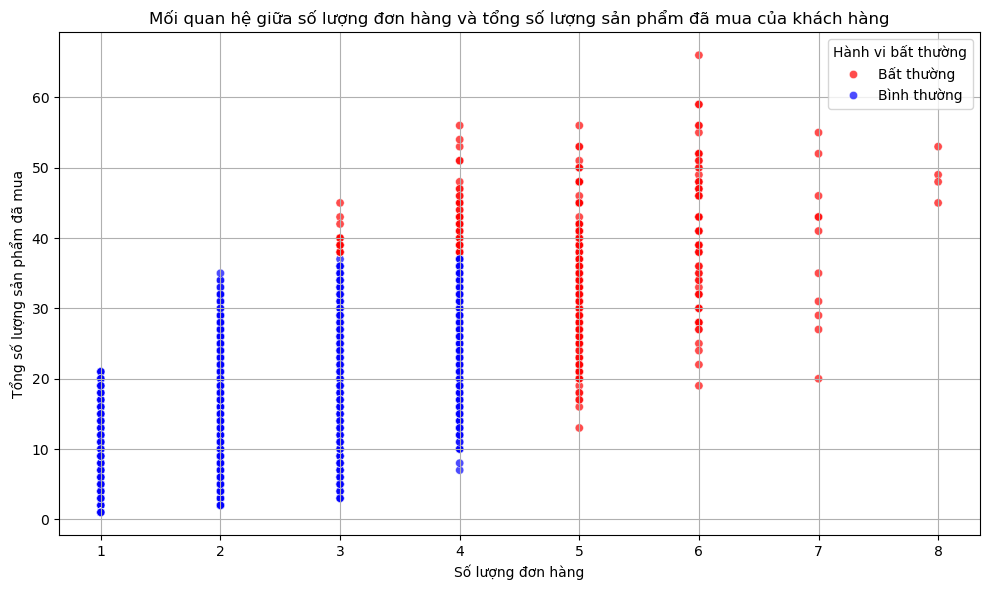

In [147]:
# Kết hợp dữ liệu customer_purchase_stats với abnormal_customers để đánh dấu hành vi bất thường
combined_stats = customer_purchase_stats.copy()

# Thêm cột xác định hành vi bất thường
combined_stats['Abnormal'] = combined_stats['Customer Id'].isin(abnormal_customers['Customer Id'])

# Tạo biểu đồ phân tán với cả số lượng đơn hàng và tổng số lượng sản phẩm đã mua
plt.figure(figsize=(10, 6))

# Biểu đồ phân tán cho tất cả khách hàng
scatter = sns.scatterplot(data=combined_stats, x='Total Orders', y='Total Quantity Purchased', hue='Abnormal', palette={True: 'red', False: 'blue'}, alpha=0.7)

# Thiết lập tiêu đề và các nhãn
plt.title('Mối quan hệ giữa số lượng đơn hàng và tổng số lượng sản phẩm đã mua của khách hàng')
plt.xlabel('Số lượng đơn hàng')
plt.ylabel('Tổng số lượng sản phẩm đã mua')

# Cập nhật các nhãn của legend để hiển thị đúng
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=[handles[1], handles[0]], labels=['Bất thường', 'Bình thường'], title='Hành vi bất thường')

# Hiển thị lưới
plt.grid(True)

# Tăng cường layout và hiển thị
plt.tight_layout()
plt.show()


KẾT LUẬN GIẢ THUYẾT (3): 

Sau khi phân tích giả thuyết và biêu đồ có thể thấy những khách hàng có số lượng đơn hàng từ 5 trở lên và sô lượng sản phẩm từ 15 trở lên là những đối tượng có hành vi mua hàng bất thường. Ngoài ra, các đối tượng có số lượng mua hàng chỉ 3 và 4 lần tuy nhiên tổng số lượng xấp xỉ 30 trở lên cùng được liệt vào những đối tượng có hành vi mua hàng bất thường. Cần xem xét những đối tượng khách hàng trên để phòng ngữa khách lợi dụng hệ thống COD.

Giả thuyết (4): Các đơn hàng có mức giảm giá bất thường hoặc tỷ lệ giảm giá bât thường có thể là dấu hiệu của hành vi gian lận COD của khách hàng.

In [150]:
# Xác định các đơn hàng có mức giảm giá bất thường
abnormal_discount_orders = cod_risk_df[
    (cod_risk_df['Order Item Discount'] > cod_risk_df['Order Item Discount'].quantile(0.95)) |
    (cod_risk_df['Order Item Discount Rate'] > cod_risk_df['Order Item Discount Rate'].quantile(0.95))
]
print(f"Số lượng đơn hàng có mức giảm giá bất thường hoặc tỷ lệ giảm giá bất thường: {len(abnormal_discount_orders)}")
print(tabulate(abnormal_discount_orders[['Customer Id', 'Order Item Discount', 'Order Item Discount Rate']].head(), headers='keys', tablefmt='pretty'))


Số lượng đơn hàng có mức giảm giá bất thường hoặc tỷ lệ giảm giá bất thường: 2940
+-----+-------------+---------------------+--------------------------+
|     | Customer Id | Order Item Discount | Order Item Discount Rate |
+-----+-------------+---------------------+--------------------------+
| 30  |   19463.0   |     65.55000305     |       0.200000003        |
| 65  |   3570.0    |     74.98999786     |           0.25           |
| 380 |   19427.0   |     65.55000305     |       0.200000003        |
| 398 |   19409.0   |     65.55000305     |       0.200000003        |
| 399 |   19408.0   |     81.94000244     |           0.25           |
+-----+-------------+---------------------+--------------------------+


In [151]:
print(cod_risk_df['Order Item Discount'].describe())
cod_risk_df['Order Item Discount Rate'].describe()

count    59283.000000
mean        20.585788
std         21.685226
min          0.000000
25%          5.500000
50%         14.000000
75%         29.990000
max        400.000000
Name: Order Item Discount, dtype: float64


count    59283.000000
mean         0.101622
std          0.070226
min          0.000000
25%          0.040000
50%          0.090000
75%          0.160000
max          0.250000
Name: Order Item Discount Rate, dtype: float64

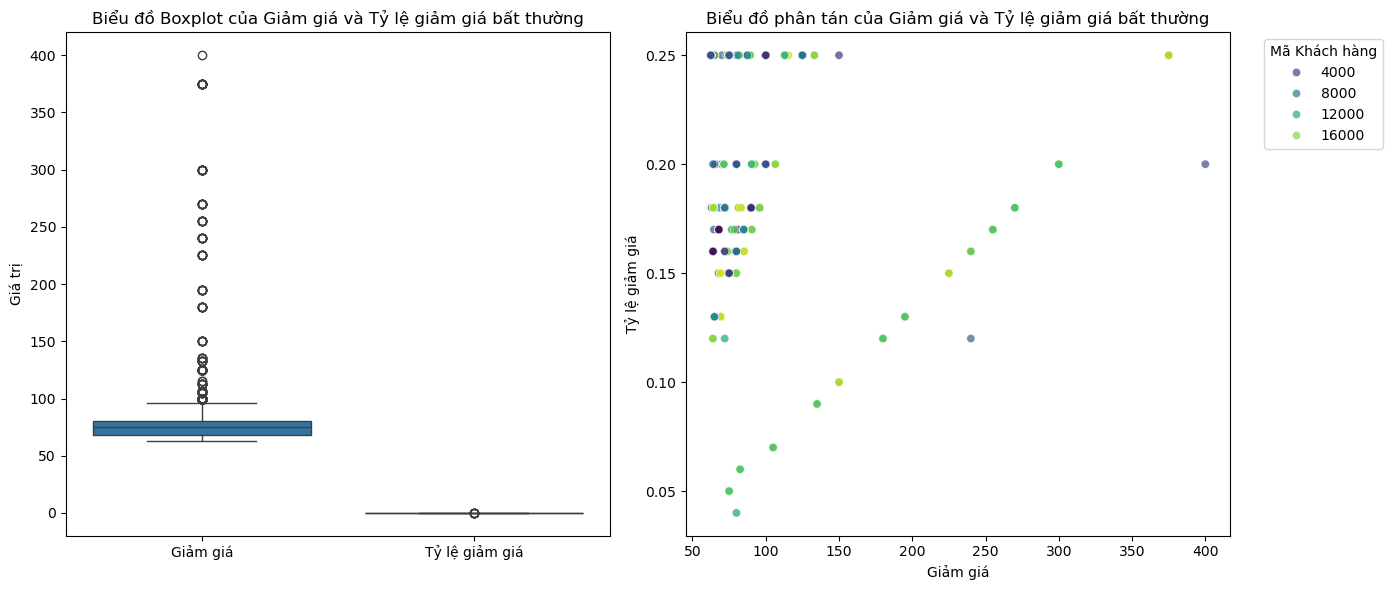

In [152]:
# Thiết lập kích thước hình ảnh
plt.figure(figsize=(14, 6))

# Bước 1: Boxplot để kiểm tra phân phối giảm giá
plt.subplot(1, 2, 1)
sns.boxplot(data=abnormal_discount_orders[['Order Item Discount', 'Order Item Discount Rate']])
plt.title('Biểu đồ Boxplot của Giảm giá và Tỷ lệ giảm giá bất thường')
plt.ylabel('Giá trị')
plt.xticks([0, 1], ['Giảm giá', 'Tỷ lệ giảm giá'])

# Bước 2: Biểu đồ phân tán
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=abnormal_discount_orders, 
    x='Order Item Discount', 
    y='Order Item Discount Rate', 
    hue='Customer Id', 
    palette='viridis', 
    alpha=0.7
)
plt.title('Biểu đồ phân tán của Giảm giá và Tỷ lệ giảm giá bất thường')
plt.xlabel('Giảm giá')
plt.ylabel('Tỷ lệ giảm giá')
plt.legend(title='Mã Khách hàng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


KẾT LUẬN GIẢ THUYẾT (4):

Sau khi phân tích giả thuyết và biểu đồ, có thể thấy các đơn hàng có giá trị giảm giá bất thường từ 100 trờ lên có khả năng khách hàng thực hiện gian lận COD. 

Ngoài ra các khách hàng có giá trị giảm giá bất thường và tỷ lệ giảm giá bất thường có tần xuất thường xuyên là các "Customer Id": 4000,2000,12000,16000, cần xem xét các hành vi giảm giá bất thường thường xuất phát từ ý đồ của khách hàng nhằm lợi dụng hệ thống COD.

# Kết hợp các giả thuyết


SAU KHI THỰC HIỆN PHÂN TÍCH VÀ LẤY RA DANH DACH CÁC ĐỐI TƯỢNG TÀI XẾ HAY KHÁCH HÀNG CÓ KHẢ NĂNG GIAN LẬN COD, TÔI THỰC HIỆN KẾT LUẬN CÁC GIÁ THUYẾT ĐỂ GIẢM THIỂU CÁC SAI SỐ CŨNG NHƯ XAC ĐỊNH CHẮC CHẮN HƠN DANH SACH CÁC ĐỐI TƯỢNG TRÊN

Kết hợp Giả thuyết (1) và (2) :  Kiểm tra tài xế 

In [245]:
# Inner join hai bảng dựa trên cột 'Order Id'
combine_1_2 = pd.merge(abnormal_profit_orders[['Order Id']],
                        abnormal_shipping_time[['Order Id']],
                        on='Order Id', 
                        how='inner')

# Loại bỏ các hàng trùng lặp dựa trên 'Order Id'
combine_1_2_unique = combine_1_2.drop_duplicates(subset=['Order Id'])

# Hiển thị kết quả
print(combine_1_2_unique)


      Order Id
0        49075
4        41590
6        75780
7        73105
8        19540
...        ...
994       9430
998       8750
1000      7930
1003     52820
1005     26480

[219 rows x 1 columns]


Từ việc kết hợp giả thuyết (1) và (2) tôi lấy được 1 danh sách gồm 219 đơn hàng có tài xế có hành vi gian lận COD. Từ danh sách đơn hàng trên có thể truy xuất mã định danh tài xế để áp dụng những chế tài, biện pháp trừng phát phù hợp

Kết hợp Giả thuyết (1) (3) và (4): Kiểm tra khách hàng

In [247]:
# Inner join ba bảng dựa trên cột 'Customer Id'
combine_3_4 = pd.merge(abnormal_customers[['Customer Id']],
                       abnormal_discount_orders[['Customer Id']],
                       on='Customer Id', 
                       how='inner')

combine_1_3_4 = pd.merge(combine_3_4[['Customer Id']],
                         abnormal_profit_orders[['Customer Id']],
                         on='Customer Id', 
                         how='inner')

# Loại bỏ các hàng trùng lặp dựa trên 'Customer Id'
combine_1_3_4_unique = combine_1_3_4.drop_duplicates(subset=['Customer Id'])

# Hiển thị kết quả
print(combine_1_3_4_unique)


     Customer Id
0             31
2             83
3            172
10           194
20           341
..           ...
960        11888
965        12018
967        12039
979        12284
980        12317

[165 rows x 1 columns]


Từ việc kết hợp giả thuyết (1) (3) và (4) tôi lấy được 1 danh sách gồm 165 khách hàng có hành vi thực hiện gian lận COD. Từ danh sách trên có thể đưa ra các biện pháp chừng phạt với những tài khoản khác hàng này

# Đưa ra các ins

Sau khi phân tích các giả thuyết và dữ liệu liên quan đến hành vi gian lận COD (Cash on Delivery), tôi đã rút ra được một số insight quan trọng, giúp nhận diện các yếu tố tiềm ẩn rủi ro và hành vi gian lận. Các insight này không chỉ phản ánh tình trạng hiện tại mà còn cung cấp các chỉ báo về các khu vực cần được giám sát chặt chẽ hơn để ngăn ngừa gian lận. Dưới đây là những insight quan trọng từ quá trình phân tích:
INSIGHT 1: Các đơn hàng có lợi nhuận âm và giá trị quá lớn có thể có sự gian lận liên quan đến việc chờ thanh toán hoặc việc tạm hoãn thanh toán. Những đơn hàng này có thể là những giao dịch không thực tế hoặc cố tình bị làm khó để không thanh toán COD đúng hạn.

INSIGHT 2: Các trường hợp giao hàng bất thường cho thấy các đơn hàng bị hủy hoặc bị nghi ngờ gian lận có khả năng bị gian lận COD, do tài xế có thể đang cố tình trì hoãn giao hàng hoặc thay đổi trạng thái đơn hàng để chiếm đoạt tiền COD.

INSIGHT 3: Các khách hàng có tần suất mua hàng cao (5 đơn hàng trở lên) và số lượng sản phẩm lớn (15 sản phẩm trở lên) có thể là đối tượng lợi dụng hệ thống COD để thực hiện gian lận, có thể vì họ đang thử nghiệm các phương thức thanh toán mà không phải chịu trách nhiệm.

INSIGHT 4: Các đơn hàng có giá trị giảm giá bất thường từ 100 trở lên có thể liên quan đến hành vi gian lận COD, đặc biệt là đối với các khách hàng có tần suất giảm giá cao. Những khách hàng này có thể đang cố tình thao túng hệ thống giảm giá và COD để giảm thiểu chi phí hoặc thay đổi giá trị đơn hàng.